In [1]:
# Import the dependencies 
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# import html/api library
import requests
# Import the datetime module from the datetime library.
# Import time too
from datetime import datetime
import time
# import my keys
from config import open_weather_api_key

In [21]:
# create a set if random latitude and longitude combinations 
# we know random pairs will not always result in a city, so make the list several times > 500
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [22]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [23]:
# Starting URL for Weather Map API Call.
# lets build it using f-strings 
api_url = "http://api.openweathermap.org/data/2.5/weather?"
api_key = "APPID=" + open_weather_api_key
# common API parameters used in each call
# you can split out 'Imperial' so the user can select units dynamically
api_shared = "&units=Imperial"
url = f"{api_url}{api_key}{api_shared}"
print(url)

http://api.openweathermap.org/data/2.5/weather?APPID=b8745ccf95b38c8f3daa766a4aa3ffd3&units=Imperial


In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #print(city_url)

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nouadhibou
Processing Record 2 of Set 1 | zaraza
Processing Record 3 of Set 1 | bumba
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | chunhuhub
Processing Record 6 of Set 1 | puerto escondido
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | riberalta
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | avera
Processing Record 13 of Set 1 | marsa matruh
Processing Record 14 of Set 1 | moussoro
Processing Record 15 of Set 1 | puri
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | georgetown
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | valladolid
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | saint-augustin
Processing Record 23 of Set 1 |

Processing Record 37 of Set 4 | skalistyy
City not found. Skipping...
Processing Record 38 of Set 4 | pangnirtung
Processing Record 39 of Set 4 | ahumada
City not found. Skipping...
Processing Record 40 of Set 4 | masuda
Processing Record 41 of Set 4 | russell
Processing Record 42 of Set 4 | mogadishu
Processing Record 43 of Set 4 | mazatlan
Processing Record 44 of Set 4 | huarmey
Processing Record 45 of Set 4 | gat
Processing Record 46 of Set 4 | geraldton
Processing Record 47 of Set 4 | soyo
Processing Record 48 of Set 4 | dikson
Processing Record 49 of Set 4 | lagoa
Processing Record 50 of Set 4 | yomitan
City not found. Skipping...
Processing Record 1 of Set 5 | mabaruma
Processing Record 2 of Set 5 | zlatoustovsk
City not found. Skipping...
Processing Record 3 of Set 5 | ardakan
Processing Record 4 of Set 5 | soyaux
Processing Record 5 of Set 5 | hithadhoo
Processing Record 6 of Set 5 | buala
Processing Record 7 of Set 5 | waitati
Processing Record 8 of Set 5 | amderma
City not fo

Processing Record 29 of Set 8 | tautira
Processing Record 30 of Set 8 | salalah
Processing Record 31 of Set 8 | sinnar
Processing Record 32 of Set 8 | elliot
Processing Record 33 of Set 8 | oksfjord
Processing Record 34 of Set 8 | nara
Processing Record 35 of Set 8 | arawa
Processing Record 36 of Set 8 | uvinza
Processing Record 37 of Set 8 | senador guiomard
Processing Record 38 of Set 8 | neiafu
Processing Record 39 of Set 8 | maniitsoq
Processing Record 40 of Set 8 | broken hill
Processing Record 41 of Set 8 | tilichiki
Processing Record 42 of Set 8 | ouesso
Processing Record 43 of Set 8 | skjervoy
Processing Record 44 of Set 8 | griffith
Processing Record 45 of Set 8 | duz
City not found. Skipping...
Processing Record 46 of Set 8 | hamilton
Processing Record 47 of Set 8 | hami
Processing Record 48 of Set 8 | charters towers
Processing Record 49 of Set 8 | saint-louis
Processing Record 50 of Set 8 | bulawayo
Processing Record 1 of Set 9 | sambava
Processing Record 2 of Set 9 | tasbu

Processing Record 15 of Set 12 | yambio
Processing Record 16 of Set 12 | port keats
Processing Record 17 of Set 12 | kuche
City not found. Skipping...
Processing Record 18 of Set 12 | ola
Processing Record 19 of Set 12 | sakit
Processing Record 20 of Set 12 | quatre cocos
Processing Record 21 of Set 12 | lolua
City not found. Skipping...
Processing Record 22 of Set 12 | ovalle
Processing Record 23 of Set 12 | shingu
Processing Record 24 of Set 12 | mohnesee
Processing Record 25 of Set 12 | makakilo city
Processing Record 26 of Set 12 | tuim
Processing Record 27 of Set 12 | oranjemund
Processing Record 28 of Set 12 | sergeyevka
Processing Record 29 of Set 12 | anchorage
Processing Record 30 of Set 12 | abu samrah
Processing Record 31 of Set 12 | mehamn
Processing Record 32 of Set 12 | sechura
Processing Record 33 of Set 12 | kaeng khlo
City not found. Skipping...
Processing Record 34 of Set 12 | orchard homes
Processing Record 35 of Set 12 | bosaso
Processing Record 36 of Set 12 | half 

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nouadhibou,20.9310,-17.0347,66.20,82,0,17.27,MR,2021-03-27 20:38:59
1,Zaraza,9.3503,-65.3245,87.71,45,95,11.23,VE,2021-03-27 20:38:59
2,Bumba,2.1833,22.4667,73.06,78,68,1.14,CD,2021-03-27 20:38:59
3,Rikitea,-23.1203,-134.9692,79.45,71,2,18.79,PF,2021-03-27 20:38:59
4,Chunhuhub,19.5500,-88.6833,91.13,40,66,9.33,MX,2021-03-27 20:38:59
5,Puerto Escondido,15.8500,-97.0667,86.47,45,0,8.16,MX,2021-03-27 20:39:00
6,Carnarvon,-24.8667,113.6333,75.20,78,40,5.75,AU,2021-03-27 20:39:00
7,Bethel,41.3712,-73.4140,64.40,36,20,8.05,US,2021-03-27 20:39:00
8,Riberalta,-10.9833,-66.1000,82.40,83,75,4.61,BO,2021-03-27 20:39:00
9,Mataura,-46.1927,168.8643,57.00,95,98,3.00,NZ,2021-03-27 20:39:01


In [26]:
# we'll reorganize the columns to practice the panda technique.  The logical approach would be to update the order 
# of the variables above when we append them to the dictionary/list
col_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[col_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nouadhibou,MR,2021-03-27 20:38:59,20.9310,-17.0347,66.20,82,0,17.27
1,Zaraza,VE,2021-03-27 20:38:59,9.3503,-65.3245,87.71,45,95,11.23
2,Bumba,CD,2021-03-27 20:38:59,2.1833,22.4667,73.06,78,68,1.14
3,Rikitea,PF,2021-03-27 20:38:59,-23.1203,-134.9692,79.45,71,2,18.79
4,Chunhuhub,MX,2021-03-27 20:38:59,19.5500,-88.6833,91.13,40,66,9.33
...,...,...,...,...,...,...,...,...,...
568,Evensk,RU,2021-03-27 20:40:56,61.9500,159.2333,-3.60,85,5,7.07
569,Umm Kaddadah,SD,2021-03-27 20:40:56,13.6017,26.6876,73.44,15,100,20.31
570,Rio Gallegos,AR,2021-03-27 20:40:56,-51.6226,-69.2181,68.00,37,40,28.77
571,Arman,RU,2021-03-27 20:40:56,59.7000,150.1667,-2.52,97,95,3.91


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

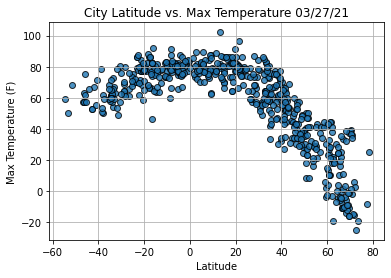

In [50]:
# Build the scatter plot for latitude vs. max temperature.
#plt.subplots(figsize=(15, 10))
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

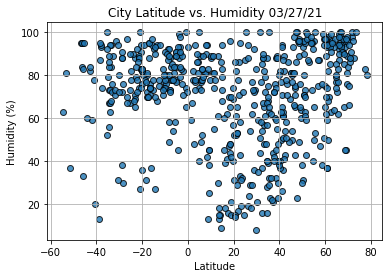

In [51]:
# Build the scatter plot for latitude vs.Humidity.
#plt.subplots(figsize=(15, 10))
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

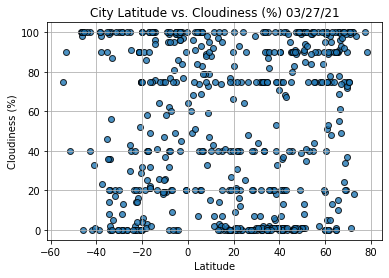

In [52]:
# Build the scatter plot for latitude vs.Cloudiness.
#plt.subplots(figsize=(15, 10))
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

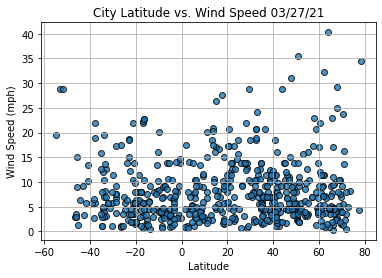

In [53]:
# Build the scatter plot for latitude vs.Wind Speed.
#plt.subplots(figsize=(15, 10))
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()